Theory and Code: https://medium.com/@bijil.subhash/explainable-ai-saliency-maps-89098e230100



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tf_keras_vis
!pip install vis

In [ ]:
#dependencies
import shutil
import os
import random
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

#from vis.utils import utils
from tf_keras_vis.utils.scores import CategoricalScore
from keras.models import load_model

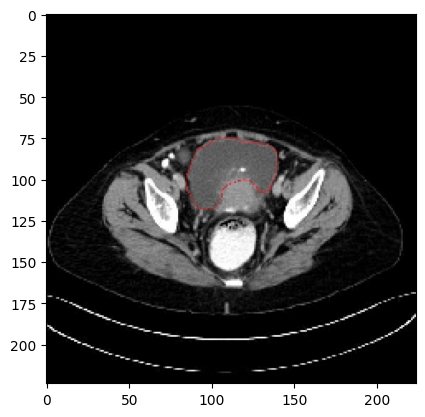

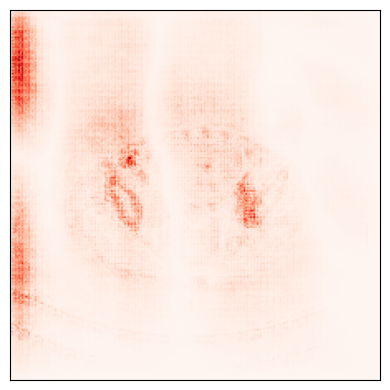

In [ ]:
#loading the image and converting it to numpy array

#img_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Test/Benign/IM235_2.jpg'
#img_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Train/Benign/Folder_60_3_1_img1.jpg'
#img_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Train/Benign/Folder_60_3_1_img265.jpg'

#img_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Benign/Folder_3_1_4_img064.jpeg'
#img_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Benign/IMG-0015.jpg'

#img_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Malignant/70.jpg'
img_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Malignant/Folder_21_3_1_img11.jpg'


img = tf.keras.preprocessing.image.load_img(img_path,target_size=(224,224))
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

plt.imshow(img)

# swap last layer with linear layer
'''
layer_idx = utils.find_layer_idx(model, model.layers[-1].name)
model.layers[-1].activation = tf.keras.activations.linear
model = utils.apply_modifications(model)
'''

layer_name = 'fc_3'
model = load_model('/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Ovarian_Image_classification_ResNet60.h5')
model2 = model

model2.layers[-1].activation = tf.keras.activations.linear

score = CategoricalScore([0])

#Create Saliency object
saliency = Saliency(model2, clone=False)

subplot_args = {
   'nrows': 1,
   'ncols': 1,
   'figsize': (5, 4),
   'subplot_kw': {'xticks': [], 'yticks': []}
}

# Generate saliency map
saliency_map = saliency(score, x, smooth_samples=20, smooth_noise=0.2)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subplot_args)
ax.imshow(saliency_map[0], cmap='Reds')
plt.tight_layout()
plt.show()

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 64)         9472      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1[0][0]']           